## Constrained multiobjective optimization using MOBO


In [4]:
# main function
import numpy as np
import torch
import matplotlib.pyplot as plt

from xopt.mobo import mobo

# test function
from xopt.evaluators import test_TNK
?mobo


Signature: mobo(config, evaluate_f, ref=None, **kwargs)
Docstring:
Constrained Multi-objective Bayesian Optimization

Parameters
----------
config : dict
    Varabiles, objectives, constraints and statics dictionary, see xopt documentation for detials

evaluate_f : callable
    Returns dict of outputs after problem has been evaluated


Optional kwargs arguments
--------
n_steps : int, default: 30
    Number of optimization steps to take

executor : futures.Executor, default: None
    Executor object to evaluate problem using multiple threads or processors

n_initial_samples : int, defualt: 5
    Number of initial sobel_random samples to take to start optimization. Ignored if initial_x is not None.

custom_model : callable, optional
    Function in the form f(train_x, train_y) that returns a botorch model instance

output_path : str, optional
    Location to save optimization data and models.

verbose : bool, default: False
    Specify if the algorithm should print optimization progress

In [2]:
# Get VOCS
VOCS = test_TNK.VOCS

# add reference point
ref = [1.4, 1.4]

print(VOCS)
# Get evaluate function
EVALUATE = test_TNK.evaluate_TNK


# Run the optimization
results = mobo(VOCS, EVALUATE, 
               ref = ref,
               n_initial_samples=5,                   ## Specify number of initial random samples
               initial_x=None,                        ## Specify explicit initial sample locations (overwrites n_initial_samples)
               use_gpu=False,                         ## Use GPU
               n_steps=20,                            ## number of optimization step
               # restart_data_file = 'results.json',  ## restart optimization file
               # batch_size = 5,                      ## Specify batched mobo
               # custom_model = myCustomModel,        ## Specify custom model creation function (see examples/bayes_exp/serial_nans.ipynb)
               verbose=True)

print(results.keys())

{'name': 'TNK_test', 'description': 'Constrainted test function TNK. See Table V in https://www.iitk.ac.in/kangal/Deb_NSGA-II.pdf', 'simulation': 'test_TNK', 'variables': {'x1': [0, 3.14159], 'x2': [0, 3.14159]}, 'objectives': {'y1': 'MINIMIZE', 'y2': 'MINIMIZE'}, 'constraints': {'c1': ['GREATER_THAN', 0], 'c2': ['LESS_THAN', 0.5]}, 'constants': {'a': 'dummy_constant'}, 'linked_variables': {'x9': 'x1'}}
No executor given. Running in serial mode.
n_feas: 1
tensor([[0.7081, 0.1125]], dtype=torch.float64)
n_feas: 1
tensor([[0.2336, 0.0000]], dtype=torch.float64)
n_feas: 1
tensor([[0.9566, 0.0000]], dtype=torch.float64)
n_feas: 1
tensor([[1.0756, 0.2269]], dtype=torch.float64)
n_feas: 2
tensor([[0.1801, 0.6828]], dtype=torch.float64)
n_feas: 2
tensor([[0.3046, 0.9666]], dtype=torch.float64)
n_feas: 3
tensor([[1.0384, 0.0750]], dtype=torch.float64)
n_feas: 4
tensor([[0.8343, 0.6140]], dtype=torch.float64)
n_feas: 5
tensor([[0.6328, 0.7687]], dtype=torch.float64)
n_feas: 5
tensor([[0.1043, 1

['variables', 'objectives', 'constraints', 'constraint_status', 'feasibility', 'model']


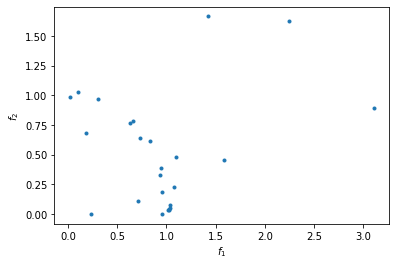

In [3]:
fig, ax = plt.subplots()
print(list(results.keys()))
ax.plot(results['objectives'][:, 0], results['objectives'][:, 1], '.')
ax.set_ylabel('$f_2$')
ax.set_xlabel('$f_1$')
plt.show()